In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import differential_evolution, NonlinearConstraint, Bounds, minimize, fmin, rosen

In [3]:
# Generate universe variables
x_in = np.arange(0, np.pi, 0.01)
y_out = np.arange(0, 1, 0.01)


#well this function takes a vector/list of variables for mf boundies with input & spits out a number for sin()
def sin(X, x):
    x_lo = fuzz.gaussmf(x_in, X[0], X[1])
    x_md = fuzz.gaussmf(x_in, X[2], X[3])
    x_hi = fuzz.gaussmf(x_in, X[4], X[5])
   
    y_lo = fuzz.gaussmf(y_out, X[6], X[7])
    y_hi = fuzz.gaussmf(y_out, X[8], X[9])
    
    x_le_lo = fuzz.interp_membership(x_in, x_lo, x)
    x_le_md = fuzz.interp_membership(x_in, x_md, x)
    x_le_hi = fuzz.interp_membership(x_in, x_hi, x)

    #rule1: if x == lo -> y = lo
    y_act_lo1 = np.fmax(np.fmin(x_le_lo, y_lo), 1-x_le_lo)
    
    #rule2: if x == md -> y = hi
    y_act_hi = np.fmax(np.fmin(x_le_md, y_hi), 1-x_le_md)
    
    #rule3: if x == hi -> y = lo
    y_act_lo2 = np.fmax(np.fmin(x_le_hi, y_lo), 1-x_le_hi)
    
    y_act_lo = np.fmax(y_act_lo1, y_act_lo2)
    
    agg = np.fmin(y_act_lo, y_act_hi)
    
    if agg.sum() == 0:
        return 1/2

    y = fuzz.defuzz(y_out, agg, 'centroid')
    
    return y

In [4]:
sin([0, 1, 2, 1, 3, 1, 0, 1, 1, 1], 2)

0.5196379335065262

In [5]:
np.sin(2)

0.9092974268256817

In [6]:
def Error1(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4)])
    return np.linalg.norm(v, 2)

In [7]:
Error1([0, 1, 2, 1, 3, 1, 0, 1, 1, 1])

0.5711024979029921

In [9]:
#constrains & Bounds
#bounds = [(0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, 1), (0, 1), (0, 1), (0, 1)]
bounds = [(-np.pi, 2*np.pi), (-np.pi, 2*np.pi), (-np.pi, 2*np.pi), (-np.pi, 2*np.pi), (-np.pi, 2*np.pi), (-np.pi, 2*np.pi), (-1, 2), (-1, 2), (-1, 2), (-1, 2)]

In [10]:
xinitial = [0, 1, 2, 1, 3, 1, 0, 1, 1, 1]
result1 = differential_evolution(Error1, bounds, x0 = xinitial)
result1.x, result1.fun

(array([-7.89956908e-01,  3.19600871e+00,  1.57086675e+00,  6.28282304e+00,
        -2.39439804e+00, -5.86602683e-01,  1.59084925e+00,  3.26414744e-01,
         9.89911999e-01, -4.62676281e-03]),
 0.014469612016027745)

In [11]:
sin(result1.x, 2)

0.8487053229275429

In [12]:
np.sin(2)

0.9092974268256817

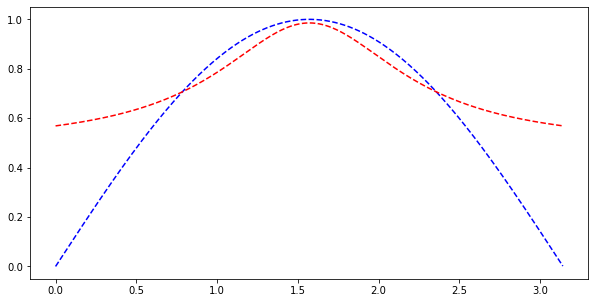

In [13]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result1.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [14]:
def Error2(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4/2)-sin(X,p4/2), np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4), np.sin(7*p4/2)-sin(X,7*p4/2)])
    return np.linalg.norm(v, 2)

In [15]:
result2 = differential_evolution(Error2, bounds, x0 = result1.x)
result2.x, result2.fun

(array([ 0.31695853, -0.84120097,  1.49293784,  5.79378376, -0.09043206,
         5.07450033, -0.60402639, -0.41472447,  1.17039678,  0.09157206]),
 0.1986524272233931)

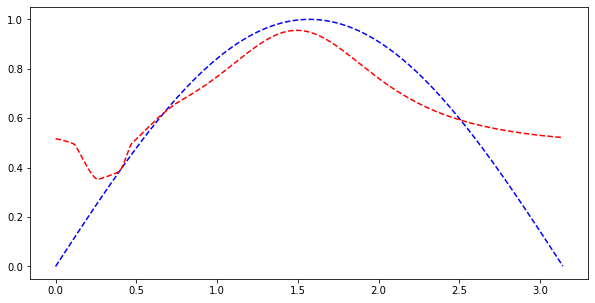

In [16]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result2.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [17]:
def Error3(X):
    p4 = np.pi/4
    v = np.array([np.sin(0)-sin(X,0),np.sin(p4/2)-sin(X,p4/2), np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4),
                  np.sin(3*p4)-sin(X,3*p4), np.sin(7*p4/2)-sin(X,7*p4/2), np.sin(np.pi)-sin(X,np.pi)])
    return np.linalg.norm(v, 2)

In [18]:
result3 = differential_evolution(Error3, bounds, x0 = result2.x)
result3.x, result3.fun

(array([-0.02965085,  2.68477292,  1.47424961,  4.55115458,  0.02368184,
         2.14429091,  0.04767563,  0.01954928,  1.31829659,  0.16949126]),
 0.5468397214733051)

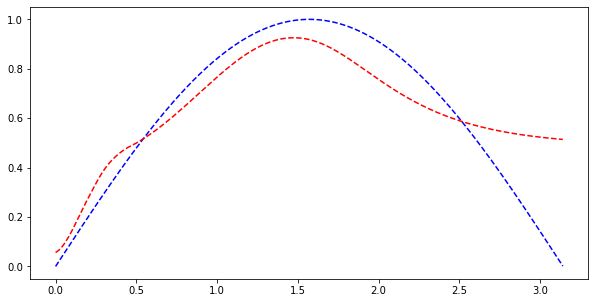

In [19]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result3.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [20]:
def Error4(X):
    p2 = np.pi/2
    p3 = np.pi/3
    p4 = np.pi/4
    p8 = np.pi/8
    v = np.array([np.sin(1e-2)-sin(X,1e-2),np.sin(p8)-sin(X,p8), np.sin(p4)-sin(X,p4), np.sin(p3)-sin(X,p3), np.sin(p2)-sin(X,p2),
        np.sin(2*p3)-sin(X,2*p3),np.sin(3*p4)-sin(X,3*p4), np.sin(7*p8)-sin(X,7*p8), np.sin(np.pi-1e-2)-sin(X,np.pi-1e-2)])
    return np.linalg.norm(v, 2)

In [21]:
result4 = differential_evolution(Error4, bounds, x0 = result3.x)
result4.x, result4.fun

(array([ 0.0426315 ,  2.52464723,  1.4765742 ,  5.42095457, -0.01265341,
         3.27592845,  0.03308325,  0.01558752,  1.62033277,  0.28848653]),
 0.5773147972056236)

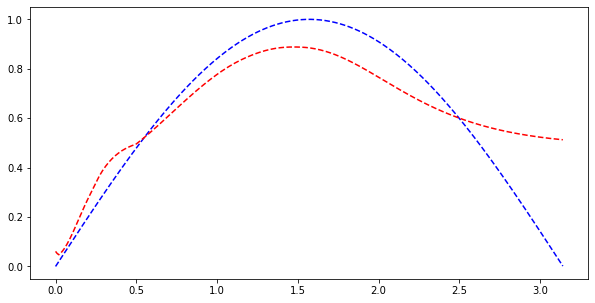

In [22]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result4.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [23]:
def Error5(X):
    p2 = np.pi/2
    p3 = np.pi/3
    p4 = np.pi/4
    p8 = np.pi/8
    p15 = np.pi/15
    v = np.array([np.sin(1e-2)-sin(X,1e-2), np.sin(p15)-sin(X,p15), np.sin(p8)-sin(X,p8), np.sin(p4)-sin(X,p4), np.sin(p3)-sin(X,p3), np.sin(p2)-sin(X,p2),
        np.sin(2*p3)-sin(X,2*p3),np.sin(3*p4)-sin(X,3*p4), np.sin(7*p8)-sin(X,7*p8), np.sin(14*p15)-sin(X,14*p15), np.sin(np.pi-1e-2)-sin(X,np.pi-1e-2)])
    return np.linalg.norm(v, 2)

In [24]:
result5 = differential_evolution(Error5, bounds, x0 = result4.x)
result5.x, result5.fun

(array([ 0.04907955,  2.23054011,  1.4727433 ,  4.54961634,  0.0439651 ,
         2.92309785,  0.02601088, -0.03510937,  1.60700323,  0.28891451]),
 0.6545899759692465)

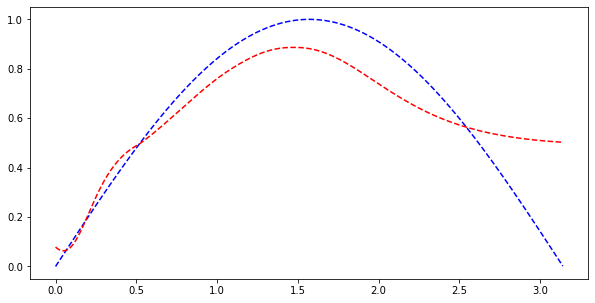

In [25]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result5.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()